# NEPOOL: IDR Drop

## Usage

* The purpose of this is to make life easier for all NEPOOL utilities who give us IDR data outside of PSNH (whose data is already vertical)
* General use case assumes **data is downloaded horizontally in hourly intervals**

## Goals

* Goal is to generate output that filters through variables and channels to give us a .csv of only kWh
* Secondary goal is to rearrange data vertically in case it needs to be broken up into chunks & uploaded
* Additional goals include visualization to check for problem areas and avoid rejection

## To Do

* check for large gaps of blanks (split into sep files)
* <strike> check for multiple channel ones (usually can combine to make single channel one) </strike>
* set up to batch process a list of files or ones not already processed?

## Errors

* **8851031017_MECO_IDR_RAW.csv in MECO**

## Code

### Import libraries, get directory (*change to correct folder*), view files

In [1]:
%matplotlib notebook
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
master = np.array([])
os.getcwd()

'C:\\Users\\wb5888\\LA-tools\\IDR_Drop'

In [2]:
dl_path = 'C:\\Users\\wb5888\\Downloads'
os.chdir(dl_path)
files = os.listdir()

time = []
for file in files:
    sys_time = round(os.path.getmtime(dl_path + "\\" + file))
    time.append(datetime.fromtimestamp(sys_time))

time = np.array(time)
lab = ['files']
dlfiledf = pd.DataFrame(files, columns = lab)

dlfiledf['time'] = time
dlfiledf = dlfiledf.sort_values(by = 'time', axis = 0, ascending = False).reset_index(drop = True)

print("files found in dir: ", dl_path)
print(dlfiledf.head(30))

files found in dir:  C:\Users\wb5888\Downloads
                                                files                time
0   ngrid_5c01d29b-93ab-4415-b439-5791a286b8fd_585... 2019-07-01 08:43:25
1                     IntervalData_06282019145336.csv 2019-06-28 14:53:39
2                                         desktop.ini 2019-06-27 08:08:50
3   ngrid_6474501a-807a-4749-ae70-5f9e6bd9c7e4_f2d... 2019-06-26 13:35:27
4                     IntervalData_06252019135212.csv 2019-06-25 13:52:26
5                                  scalar_buildout.py 2019-06-25 12:44:56
6                                      1-HU872K_8.csv 2019-06-25 07:43:09
7                                     output (21).csv 2019-06-25 07:42:25
8              CT Docket 14-07-19RE05 - 20190624.xlsx 2019-06-24 14:07:03
9   CT_EBT_CC-008 Summ Info on 810 - Updated 2019-... 2019-06-24 13:40:38
10  CT EBT EDI Working Group Meeting AGENDA_201906... 2019-06-24 13:32:09
11                                         Tags.ipynb 2019-06-24 

In [4]:
filepath = 'C:\\Users\\wb5888\\Documents\\Raw IDR Data\\NEPOOL\\MECO\\'

def Raw_Split(file):
    testdf = pd.read_csv(file, sep = ",", header = 0)
    account = np.unique(testdf.Account)

    for name in account:
        sub = testdf.loc[testdf.Account == name,:].reset_index(drop = True)
        fullname = str(testdf['Account'][0])
        acct_num = fullname.split(" ")[0]
        write_name = acct_num + "_MECO_IDR_RAW.csv"
        os.chdir(filepath)
        sub.to_csv(write_name, sep = ",", header = True, index = False)
        



In [6]:
use = dlfiledf.files[0]
Raw_Split(use)

In [93]:
dl_path = 'C:\\Users\\wb5888\\Downloads'
filepath = 'C:\\Users\\wb5888\\Documents\\Raw IDR Data\\NEPOOL\\MECO\\'

os.chdir(filepath)
files = np.array(os.listdir())
time = []
for file in files:
    sys_time = round(os.path.getmtime(filepath + "\\" + file))
    time.append(datetime.fromtimestamp(sys_time))

time = np.array(time)
lab = ['files']
filedf = pd.DataFrame(files, columns = lab)

filedf['time'] = time
filedf = filedf.sort_values(by = 'time', axis = 0, ascending = False).reset_index(drop = True)

print("files found in dir: ", filepath)
print(filedf.head(35))
    

files found in dir:  C:\Users\wb5888\Documents\Raw IDR Data\NEPOOL\MECO\LAWRENCE_ERROR
                           files                time
0   9012355037_MECO_IDR_RAW2.csv 2019-05-10 11:33:37
1   0303236035_MECO_IDR_RAW2.csv 2019-05-10 11:33:36
2   1572966003_MECO_IDR_RAW2.csv 2019-05-10 11:33:36
3   2685374003_MECO_IDR_RAW2.csv 2019-05-10 11:33:36
4   3464582002_MECO_IDR_RAW2.csv 2019-05-10 11:33:36
5   5272405003_MECO_IDR_RAW2.csv 2019-05-10 11:33:36
6   6518410007_MECO_IDR_RAW2.csv 2019-05-10 11:33:36
7   2515912000_MECO_IDR_RAW2.csv 2019-05-10 11:13:57
8   2519660007_MECO_IDR_RAW2.csv 2019-05-10 11:13:56
9   2853928008_MECO_IDR_RAW2.csv 2019-05-10 11:13:56
10  2873363003_MECO_IDR_RAW2.csv 2019-05-10 11:13:56
11  4100187017_MECO_IDR_RAW2.csv 2019-05-10 11:13:55
12  5166486009_MECO_IDR_RAW2.csv 2019-05-10 11:13:55


In [94]:
for raw in filedf.files:
    try:
        data_drop(raw)
        print('success')
    
    except:
        print('error')


1 uniq chnls
['1 kWh']
write directory:  C:\Users\wb5888\Documents\IDR Data\NEPOOL\MECO
writing single channel data...
0.0203 percent zeros,  9012355037_MECO_IDR.csv  saved.
success
1 uniq chnls
['1 kWh']
write directory:  C:\Users\wb5888\Documents\IDR Data\NEPOOL\MECO
writing single channel data...
0.0203 percent zeros,  0303236035_MECO_IDR.csv  saved.
success
1 uniq chnls
['1 kWh']
write directory:  C:\Users\wb5888\Documents\IDR Data\NEPOOL\MECO
writing single channel data...
0.0 percent zeros,  1572966003_MECO_IDR.csv  saved.
success
1 uniq chnls
['1 kWh']
write directory:  C:\Users\wb5888\Documents\IDR Data\NEPOOL\MECO
writing single channel data...
0.0001 percent zeros,  2685374003_MECO_IDR.csv  saved.
success
1 uniq chnls
['1 kWh']
write directory:  C:\Users\wb5888\Documents\IDR Data\NEPOOL\MECO
writing single channel data...
0.0006 percent zeros,  3464582002_MECO_IDR.csv  saved.
success
1 uniq chnls
['1 kWh']
write directory:  C:\Users\wb5888\Documents\IDR Data\NEPOOL\MECO
writi

### Check filename, use with function

In [39]:
util = 'MECO'
filepath = 'C:\\Users\\wb5888\\Documents\\Raw IDR Data\\NEPOOL\\' + util
#filepath2 = 'C:\\Users\\wb5888\\Documents\\Raw IDR Data\\use cases\\'
os.chdir(filepath)
files = np.array(os.listdir())
time = []
for file in files:
    sys_time = round(os.path.getmtime(filepath + "\\" + file))
    time.append(datetime.fromtimestamp(sys_time))

time = np.array(time)
lab = ['files']
filedf = pd.DataFrame(files, columns = lab)

filedf['time'] = time
filedf = filedf.sort_values(by = 'time', axis = 0, ascending = False).reset_index(drop = True)

print("files found in dir: ", filepath)
print(filedf.head(35))

files found in dir:  C:\Users\wb5888\Documents\Raw IDR Data\NEPOOL\MECO
                                                files                time
0                                      LAWRENCE_ERROR 2019-05-10 10:48:11
1                         2578275011_MECO_IDR_RAW.csv 2019-05-10 10:29:04
2                         1268620007_MECO_IDR_RAW.csv 2019-05-09 16:02:19
3                         0021483009_MECO_IDR_RAW.csv 2019-05-09 16:01:42
4                         0021638013_MECO_IDR_RAW.csv 2019-05-09 16:01:21
5                          NEPOOL_MECO_6374258005.csv 2019-05-09 15:42:59
6                         6519449039_MECO_IDR_RAW.csv 2019-05-09 11:40:28
7                         0261453007_MECO_IDR_RAW.csv 2019-05-09 11:40:28
8                         7799638008_MECO_IDR_RAW.csv 2019-05-09 11:40:28
9                         7818340007_MECO_IDR_RAW.csv 2019-05-09 11:40:27
10                        7726584002_MECO_IDR_RAW.csv 2019-05-09 11:40:27
11                        7655289005_MEC

Files should be given as a list, *even for single files*

In [35]:
#rec_time = datetime.fromtimestamp(1556906000)

#recents = filedf.index[filedf.time > rec_time].to_list()
#data_files = files[recents]
data_files = np.array(filedf.files[:12])
#data_files = files[20:38]
data_files

#data_drop()
#data_files[0]

array(['4100187017_MECO_IDR_RAW.csv', '5166486009_MECO_IDR_RAW.csv',
       '9012355037_MECO_IDR_RAW.csv', '1572966003_MECO_IDR_RAW.csv',
       '2519660007_MECO_IDR_RAW.csv', '2685374003_MECO_IDR_RAW.csv',
       '2853928008_MECO_IDR_RAW.csv', '2873363003_MECO_IDR_RAW.csv',
       '303236035_MECO_IDR_RAW.csv', '3464582002_MECO_IDR_RAW.csv',
       '6518410007_MECO_IDR_RAW.csv', '2515912000_MECO_IDR_RAW.csv'],
      dtype=object)

### Run function to clean data

In [36]:
error_log = []

for data_file in data_files:
    try:
        data_drop(data_file)
    except:
        print("error w/ ", data_file)
        error_log.append(data_file)

error w/  4100187017_MECO_IDR_RAW.csv
error w/  5166486009_MECO_IDR_RAW.csv
error w/  9012355037_MECO_IDR_RAW.csv
error w/  1572966003_MECO_IDR_RAW.csv
error w/  2519660007_MECO_IDR_RAW.csv
error w/  2685374003_MECO_IDR_RAW.csv
error w/  2853928008_MECO_IDR_RAW.csv
error w/  2873363003_MECO_IDR_RAW.csv
error w/  303236035_MECO_IDR_RAW.csv
error w/  3464582002_MECO_IDR_RAW.csv
error w/  6518410007_MECO_IDR_RAW.csv
error w/  2515912000_MECO_IDR_RAW.csv


In [32]:
error_log

[]

In [92]:
error_log

[]

### Save processed files to master list

In [99]:
os.chdir('C:\\Users\\wb5888\\Documents\\IDR Data\\')
master_load = np.load("IDRcleaned.npz")
#master_load.files
master_load['arr_0']

for data_file in data_files:
    if not (data_file in master):
        master = np.append(master, data_file)
        print('added file ', data_file, ' to master list')
        
np.savez("IDRcleaned", master)

added file  1331538009_MECO_IDR_RAW.csv  to master list


c:\users\wb5888\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  import sys


## Function to read in raw IDR and write separate CSV's
### Run these first!!!

**to do:**
1. <strike> spot check for zeros in 2nd channel </strike>
2. <strike> adjust to take more than two channels </strike>
3. <strike> test new channel features </strike>
4. function for vertical files
5. graph files after writing
6. track written files to allow for an IDR drop directory?


In [84]:
def data_drop(raw_file):
    
    #get utility
    file_split = raw_file.split('_')
    for x in file_split:
        try:
            int(x)
        except:
            util = x
            break
    #read in data
    #readpath = 'C:\\Users\\wb5888\\Documents\\Raw IDR Data\\NEPOOL\\' + util
    readpath = 'C:\\Users\\wb5888\\Documents\\Raw IDR Data\\NEPOOL\\MECO\\LAWRENCE_ERROR'
    os.chdir(readpath)
    #os.chdir(filepath2)
    raw = pd.read_csv(raw_file, sep = ",", header = 0)

    #group by units to filter kWh
    combo = raw.groupby('Units')
    combos = dict(list(combo))
    rel_channels = combos['kWh']

    #group by channels into unique
    rel_channels.groupby('Channel')
    uniq_channels = pd.unique(rel_channels['Channel'])
    
    #test
    print(len(uniq_channels), 'uniq chnls')
    print(uniq_channels)
    
    writepath = 'C:\\Users\\wb5888\\Documents\\IDR Data\\NEPOOL\\' + util
    #writepath2 = 'C:\\Users\\wb5888\\Documents\\Raw IDR Data\\use cases\\results\\'
    os.chdir(writepath)
    #os.chdir(writepath2)
    os.listdir()
    print("write directory: ", writepath)

    if len(uniq_channels) > 1:
        ch_data = pd.DataFrame([])
        
        clean_file1 = raw_file.replace("_RAW2", "")
        clean_file2 = raw_file.replace("RAW2", "3")

        for channel in uniq_channels:
            if(len(channel) == 1) and (int(channel) == 4):
                channel = '3'
                channel = channel + ' kWh'
                
            ch_info = np.array([channel.split(' ')[:2]])
            
            ch_data = ch_data.append(pd.DataFrame(data = ch_info, columns = ['ch_name', 'ch_num'], index = [0]), ignore_index = True)
            print(ch_info[0])
            
           
        
        print("found channels ", np.unique(ch_data.ch_num))  
        
        if len(ch_data.loc[ch_data.ch_num == "1"]) > 1:
            print("more than one channel 1")
            ch1_tmp1 = raw.loc[raw.Channel == uniq_channels[0],:]
            ch1_tmp2 = raw.loc[raw.Channel == uniq_channels[2],:]
            #check for blanks
            channel1 = filemerge(ch1_tmp1, ch1_tmp2)
            mindthegap(channel1, clean_file1, .4, .7)
            
        else:
            channel1 = raw.loc[raw.Channel == uniq_channels[0],:]
            mindthegap(channel1, clean_file1, .4, .7)
            
        #check channel 3's (should be easy)
        
        #if more than one, subset and gap check
        if len(ch_data.loc[ch_data.ch_num == "3"]) > 1:
            print("more than one channel 3")
            ch3_tmp1 = raw.loc[raw.Channel == uniq_channels[1],:]
            ch3_tmp2 = raw.loc[raw.Channel == uniq_channels[3],:]
            
            mindthegap(ch3_tmp1, clean_file2, .4, .7)
            mindthegap(ch3_tmp2, clean_file2, .4, .7)
            
        else:
            channel3 = raw.loc[raw.Channel == uniq_channels[1],:]
            mindthegap(channel3, clean_file2, .4, .7)
        
        
    elif len(uniq_channels) == 1:
        clean_data = raw.loc[raw.Units == 'kWh',:]
        clean_file = raw_file.replace("_RAW2", "")
        print("writing single channel data...")
        mindthegap(clean_data, clean_file, .4, .7)


In [85]:
#function to remove blanks from data (if a row has less than 70%)
#then compares dates and merges the files w/ the earlier date first
#(assuming one file is blank where the other is not, 
#as is commonly the case w/ channel 1 data)

def filemerge(df1, df2):
    df1 = df1[(df1.isnull().sum(axis = 1)/df1.shape[1] < .7)]
    df2 = df2[(df2.isnull().sum(axis = 1)/df2.shape[1] < .7)]
    
    first_date1 = df1.loc[:,'Date'].iloc[0] 
    first_date2 = df2.loc[:,'Date'].iloc[0]

    fd1 = datetime.strptime(first_date1, '%m/%d/%Y')
    fd2 = datetime.strptime(first_date2, '%m/%d/%Y')
    
    if fd1 < fd2:
        new_dat = pd.concat([df1, df2], ignore_index = True)
        date_count = new_dat.groupby('Date').agg('count').sum(axis = 1)
        print('spot check output file at date ', date_count.idxmax())
    
    elif fd1 > fd2:
        new_dat = pd.concat([df2, df1], ignore_index = True)
        date_count = new_dat.groupby('Date').agg('count').sum(axis = 1)
        print('spot check output file at date ', date_count.idxmax())
        
    return new_dat

In [86]:
#function to check for percent zeros in dataframe
#drops if below LB
#keeps if above UB
#merges if between LB & UB

def mindthegap(df, filename, LB, UB):
    hours = df.columns.values[4:] #get columns w/ hours
    df = df[(df.isnull().sum(axis = 1)/df.shape[1] < .5)] #remove rows w/ >= 50% blanks
    p_nzero = (df.loc[:,hours] != 0).sum().sum()/len(hours) / df.shape[0] #calc % of nonzeros
    
    if p_nzero < LB:
        print(round(1 - p_nzero, 4), "percent zeros, ", filename, " not saved.")
    
    if p_nzero > UB:
        print(round(1 - p_nzero, 4), "percent zeros, ", filename, " saved.")
        df.to_csv(filename, sep = ",", header = True, index = False)
        
    elif LB <= p_nzero <= UB:
        print(round(1 - p_nzero, 4), "percent zeros, ", filename, " merged & saved.")
        nonzero_row = ((df == 0).sum(axis = 1) < 24)
        newdf = df.loc[nonzero_row,:]
        newdf.to_csv(filename, sep = ",", header = True, index = False)


## Testing Area

In [69]:
util = 'MECO'
filepath = 'C:\\Users\\wb5888\\Documents\\Raw IDR Data\\NEPOOL\\' + util
#filepath2 = 'C:\\Users\\wb5888\\Documents\\Raw IDR Data\\use cases\\'
os.chdir(filepath)
files = np.array(os.listdir())
lab = ['files']
filedf = pd.DataFrame(files, columns = lab)

print("files found in dir: ", filepath)
print(filedf)

master = np.array([])
master = np.append(master, data_files)
master

files found in dir:  C:\Users\wb5888\Documents\Raw IDR Data\NEPOOL\MECO
                         files
0  0107216008_MECO_IDR_RAW.csv
1  0807092002_MECO_IDR_RAW.csv
2       3993388009_IDR_RAW.csv
3  6374796000_MECO_IDR_RAW.csv
4  8851031017_MECO_IDR_RAW.csv


array(['0107216008_MECO_IDR_RAW.csv', '3993388009_IDR_RAW.csv',
       '8851031017_MECO_IDR_RAW.csv'], dtype='<U32')

## Need to change horizontal to vertical?

In [176]:
channel1 = channel1.drop(['Account', 'Channel', 'Units'], axis = 1)
vars = channel1.columns.values
vars

array(['Date', '1:00', '2:00', '3:00', '4:00', '5:00', '6:00', '7:00',
       '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00',
       '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00',
       '22:00', '23:00', '24:00:00'], dtype=object)

In [177]:
clean_data2 = pd.melt(channel1, id_vars = vars[0], value_vars = vars[1:])
clean_data3 = pd.melt(channel2, id_vars = vars[0], value_vars = vars[1:])

clean_data2.columns.values

array(['Date', 'variable', 'value'], dtype=object)

In [178]:
clean_data2 = clean_data2.rename(mapper = {'Date':'Date', 'variable':'Time', 'value':'Usage (kWh)'}, axis = 'columns')
clean_data3 = clean_data3.rename(mapper = {'Date':'Date', 'variable':'Time', 'value':'Usage (kWh)'}, axis = 'columns')
clean_data2.head()

,Date,Time,Usage (kWh)
0,10/18/2018,1:00,0.000
1,10/19/2018,1:00,115.344
2,10/20/2018,1:00,113.400
3,10/21/2018,1:00,72.360
4,10/22/2018,1:00,133.920


### 6. Change Dates & Times to datetime Type

In [179]:
clean_data2['Date'] = pd.to_datetime(clean_data2['Date'] + ' ' + clean_data2['Time'], errors = 'ignore')
clean_data3['Date'] = pd.to_datetime(clean_data3['Date'] + ' ' + clean_data3['Time'], errors = 'ignore')

In [180]:
clean_data2 = clean_data2.drop('Time', axis = 1)
clean_data3 = clean_data3.drop('Time', axis = 1)
clean_data2.head()

,Date,Usage (kWh)
0,10/18/2018 1:00,0.000
1,10/19/2018 1:00,115.344
2,10/20/2018 1:00,113.400
3,10/21/2018 1:00,72.360
4,10/22/2018 1:00,133.920


### 7. Look for Gaps in Data

<IPython.core.display.Javascript object>


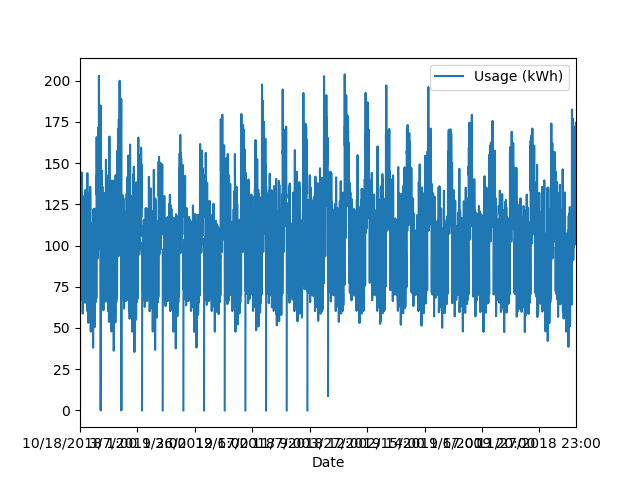

In [182]:
clean_data2.plot(x = 'Date', y = 'Usage (kWh)')

<IPython.core.display.Javascript object>


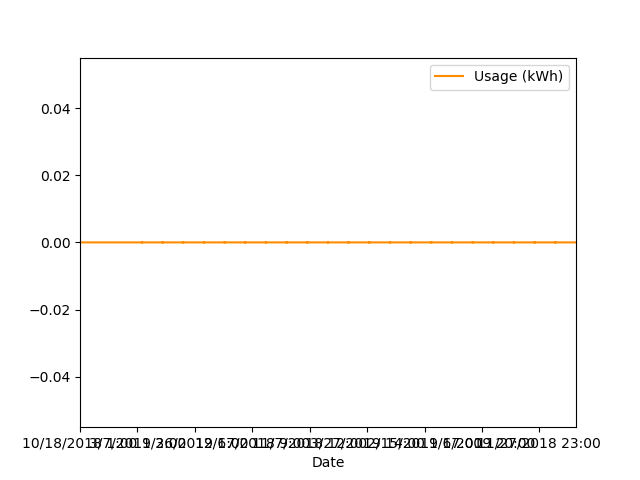

In [181]:
clean_data3.plot(x = 'Date', y = 'Usage (kWh)', color = "darkorange")

### 8. Looks good? Export to csv

In [157]:
os.getcwd()
os.chdir('C:\\Users\\wb5888\\Documents\\Python Code\\IDR_Drop\\upload_data')
os.listdir()

[]

In [160]:
clean_data2.to_csv('SAMPLE_IDR.csv', sep = ",", header = True, index = False)
os.listdir()

['SAMPLE_IDR.csv']